In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [25]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
# Make the dataset skewed, and simplify so that there are only 2 categories
y[digits.target == 7] = 1
y[digits.target != 7] = 0

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=700)
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)
logi_reg.score(X_test, y_test)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9911111111111112

In [28]:
y_logi_predict = logi_reg.predict(X_test)

## Confusion Matrix

In [29]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

confusion_matrix(y_test, y_logi_predict)

array([[409,   2],
       [  2,  37]])

In [30]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:        
        return tp / (tp + fp)
    except:
        return 0.0
    
precision_score(y_test, y_logi_predict)

0.9487179487179487

In [31]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:        
        return tp / (tp + fn)
    except:
        return 0.0
    
recall_score(y_test, y_logi_predict)

0.9487179487179487

## Use confusion in sklearn

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_logi_predict)

array([[409,   2],
       [  2,  37]])

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(y_test, y_logi_predict), recall_score(y_test, y_logi_predict)

(0.9487179487179487, 0.9487179487179487)

## F1 Score

In [34]:
def f1_score(precision, recall):
    try:        
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0
    
f1_score(0.1, 0.9)

0.18000000000000002

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_logi_predict)

0.9487179487179487

## precision-recall-balance
### By default, threshold is 0. By increasing threshold, precision score goes up when recall goes down

In [43]:
decision_scores = logi_reg.decision_function(X_test)
decision_scores[:10]

array([-20.08781572, -21.99021401, -23.66363587, -22.46538984,
       -25.29944578, -13.68791616, -23.50735667,  -8.35544643,
       -30.10319522, -21.81499973])

In [46]:
y_logi_predict2 = np.array(decision_scores > -5, dtype='int')
precision_score(y_test, y_logi_predict2), recall_score(y_test, y_logi_predict2)

(0.8043478260869565, 0.9487179487179487)

In [49]:
y_logi_predict2 = np.array(decision_scores > -7, dtype='int')
precision_score(y_test, y_logi_predict2), recall_score(y_test, y_logi_predict2)

(0.7037037037037037, 0.9743589743589743)

In [51]:
y_logi_predict2 = np.array(decision_scores > 6, dtype='int')
precision_score(y_test, y_logi_predict2), recall_score(y_test, y_logi_predict2)

(1.0, 0.7948717948717948)

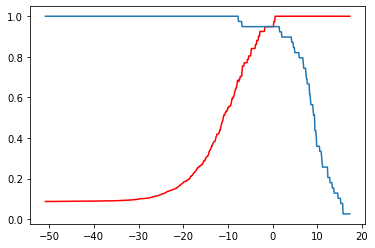

In [58]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_logi_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_logi_predict))
    recalls.append(recall_score(y_test, y_logi_predict))

plt.plot(thresholds, precisions, color='r')
plt.plot(thresholds, recalls)
plt.show()

### precision_recall_curve in sklearn

In [60]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)
# Note that The last precision and recall values are 1. and 0.
precisions.shape, recalls.shape, thresholds.shape

((58,), (58,), (57,))

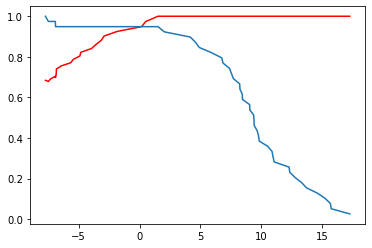

In [62]:
plt.plot(thresholds, precisions[:-1], color='r')
plt.plot(thresholds, recalls[:-1])
plt.show()

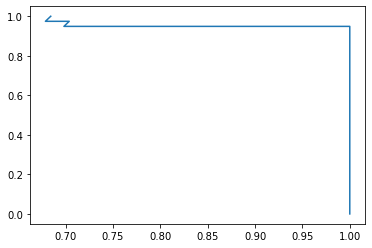

In [65]:
plt.plot(precisions, recalls)
plt.show()

## ROC Curve

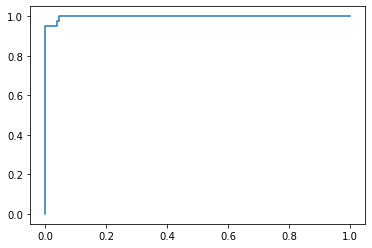

In [68]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9978788445941731

In [70]:
# No simplificatio, 10 categories
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=700)
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)
logi_reg.score(X_test, y_test)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9290681502086231

In [72]:
y_predict = logi_reg.predict(X_test)
precision_score(y_test, y_predict, average='micro')

0.9290681502086231

In [73]:
confusion_matrix(y_test, y_predict)

array([[134,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 135,   0,   0,   2,   0,   2,   0,   4,   3],
       [  2,   8, 131,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 136,   0,   5,   0,   3,   6,   0],
       [  0,   2,   0,   0, 140,   0,   0,   1,   0,   1],
       [  0,   1,   0,   2,   0, 142,   0,   0,   1,   1],
       [  0,   1,   0,   0,   2,   0, 131,   0,   1,   0],
       [  0,   0,   0,   0,   2,   9,   0, 133,   0,   3],
       [  0,   8,   1,   2,   2,   5,   0,   1, 114,   2],
       [  0,   5,   0,   3,   0,   3,   0,   0,   4, 140]])

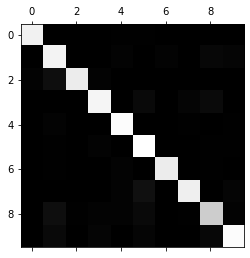

In [75]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

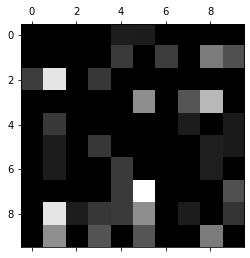

In [77]:
row_sums = np.sum(cfm,axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)  # filter correct prediction
# This graph shows where the prediction went wrong
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()